# Geometric Transformation of Images

**Prashant Brahmbhatt**  

www.github.com/hashbanger  
  
www.linkedin.com/in/prashantbrahmbhatt

### Transform

OpenCV provides two transformation functions, **cv.warpAffine** and **cv.warpPerspective**, with which you can have all kinds of transformations. cv.warpAffine takes a 2x3 transformation matrix while cv.warpPerspective takes a 3x3 transformation matrix as input.

### Scaling

Scaling is just resizing of the image. OpenCV comes with a function **cv.resize()** for this purpose. The size of the image can be specified manually, or you can specify the scaling factor. Different interpolation methods are used. Preferable interpolation methods are **cv.INTER_AREA** for shrinking and **cv.INTER_CUBIC** (slow) & **cv.INTER_LINEAR** for zooming. By default, interpolation method used is cv.INTER_LINEAR for all resizing purposes. You can resize an input image either of following methods: 

In [76]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
img = cv.imread('batwoman.jpg')

In [77]:
res = cv.resize(img, None, fx = 2, fy = 2 ,interpolation = cv.INTER_AREA )

In [79]:
#OR

height , width = img.shape[:2]
res2 = cv.resize(img, (width * 2, height * 2), interpolation = cv.INTER_LINEAR)

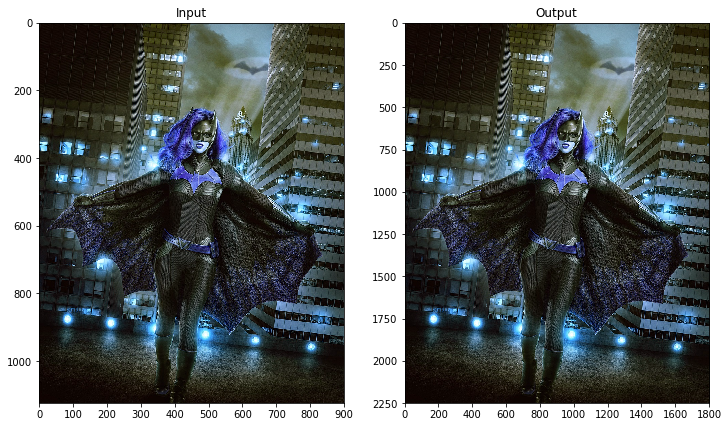

In [80]:
plt.figure(figsize= (12,10))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(res),plt.title('Output')
plt.show()

In [81]:
cv.imshow('img',res)
while True:
    k = cv.waitKey(2)
    if k == 27 & 0xFF:
        break

cv.destroyAllWindows()

### Translation 

Translation is the shifting of object's location. If you know the shift in **(x,y)** direction, let it be **(tx,ty)**, you can create the transformation matrix ***M*** as follows:

$$M = \begin{bmatrix} 1 & 0 & t_x \\ 0 & 1 & t_y \end{bmatrix}$$

We can take make it into a Numpy array of type **np.float32** and pass it into **cv.warpAffine()** function. See below example for a shift of **(100,50)**

In [45]:
M = np.float32([[1, 0, 100],[0, 1, 50]])
dst = cv.warpAffine(img, M, (height, width))

In [46]:
cv.imshow('img',dst)
while True:
    k = cv.waitKey(2)
    if k == 27 & 0xFF:
        break

cv.destroyAllWindows()

### Rotation

Rotation of an image for an angle θ is achieved by the transformation matrix of the form

$$M = \begin{bmatrix} cos\theta & -sin\theta \\ sin\theta & cos\theta \end{bmatrix}$$

But openCV provides us a way to rotate with any location as centre through transformed matrix

$$\begin{bmatrix} \alpha & \beta & (1- \alpha ) \cdot center.x - \beta \cdot center.y \\ - \beta & \alpha & \beta \cdot center.x + (1- \alpha ) \cdot center.y \end{bmatrix}$$

where

$$\begin{array}{l} \alpha = scale \cdot \cos \theta , \\ \beta = scale \cdot \sin \theta \end{array}$$

To find this transformation matrix, OpenCV provides a function, **cv.getRotationMatrix2D**

Rotating image by 90 degrees

In [56]:
rows, cols = height, width
# cols-1 and rows-1 are the coordinate limits.
M= cv.getRotationMatrix2D(((cols-1)/2, (rows-1)/2), 90, 1)
res3 = cv.warpAffine(img, M, (width, height))

In [57]:
cv.imshow('img',res3)
while True:
    k = cv.waitKey(2)
    if k == 27 & 0xFF:
        break

cv.destroyAllWindows()

### Affine Transformation

In affine transformation, all parallel lines in the original image will still be parallel in the output image. To find the transformation matrix, we need three points from input image and their corresponding locations in output image. Then **cv.getAffineTransform** will create a 2x3 matrix which is to be passed to **cv.warpAffine**.

In [67]:
img2 = cv.imread('affinp.jpg')
rows, cols, chls = img2.shape

pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

M = cv.getAffineTransform(pts1, pts2)
res4 = cv.warpAffine(img2, M, (cols, rows))

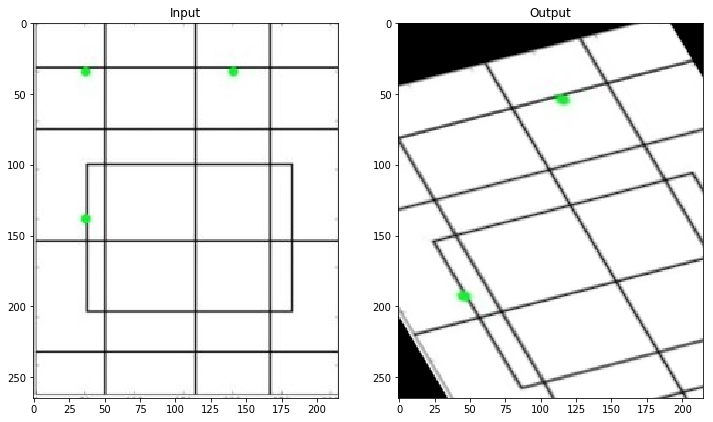

In [74]:
plt.figure(figsize= (12,10))
plt.subplot(121),plt.imshow(img2),plt.title('Input')
plt.subplot(122),plt.imshow(res4),plt.title('Output')
plt.show()

Input Image:

### Perspective transformation

For perspective transformation, we need a 3x3 transformation matrix.  
Straight lines will remain straight even after the transformation.   
To find this transformation matrix, we need 4 points on the input image and corresponding points on the output image.  
Among these 4 points, 3 of them should not be collinear.  
Then transformation matrix can be found by the function **cv.getPerspectiveTransform**.  
Then apply **cv.warpPerspective**with this 3x3 transformation matrix.

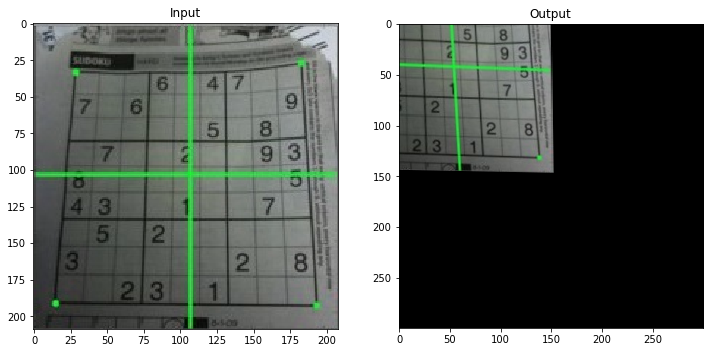

In [85]:
img = cv.imread('sudinp.jpg')
rows,cols,ch = img.shape
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
M = cv.getPerspectiveTransform(pts1,pts2)
dst = cv.warpPerspective(img,M,(300,300))
plt.figure(figsize= (12,10))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

### de nada!